# Multiple Linear regression

For this exercise we are going to generate some synthetic data and create a simple 
multivariate linear regression. The data will contain noise and we will try to recover the 
original linear equation from the noisy data.

In [1]:
# imports
import numpy as np
from numpy.random import default_rng
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# here we will generate a sample of 100 points from the equation
# y = 7.38 x_1 - 4.71 x_2 + 9.53 x_3 + 1.34 + e
# where e is randomly distributed noise
rng = default_rng()
x = np.linspace([0,0,0],[20,20,20], 100, endpoint=True) # for matrices we need to change this 
#y = (2.38*x) + 6.34
#y = np.add(y,e)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.2020202 ,  0.2020202 ,  0.2020202 ],
       [ 0.4040404 ,  0.4040404 ,  0.4040404 ],
       [ 0.60606061,  0.60606061,  0.60606061],
       [ 0.80808081,  0.80808081,  0.80808081],
       [ 1.01010101,  1.01010101,  1.01010101],
       [ 1.21212121,  1.21212121,  1.21212121],
       [ 1.41414141,  1.41414141,  1.41414141],
       [ 1.61616162,  1.61616162,  1.61616162],
       [ 1.81818182,  1.81818182,  1.81818182],
       [ 2.02020202,  2.02020202,  2.02020202],
       [ 2.22222222,  2.22222222,  2.22222222],
       [ 2.42424242,  2.42424242,  2.42424242],
       [ 2.62626263,  2.62626263,  2.62626263],
       [ 2.82828283,  2.82828283,  2.82828283],
       [ 3.03030303,  3.03030303,  3.03030303],
       [ 3.23232323,  3.23232323,  3.23232323],
       [ 3.43434343,  3.43434343,  3.43434343],
       [ 3.63636364,  3.63636364,  3.63636364],
       [ 3.83838384,  3.83838384,  3.83838384],
       [ 4.04040404,  4.04040404,  4.040

In [5]:
print(x.shape)

(100, 3)


In [12]:
e = rng.standard_normal(100) # for matrices we need to change this

In [13]:
e.shape

(100,)

In [15]:
y = x@[7.38,-4.71, 9.53] + e 

In [17]:
y + 1.34

array([  2.2434502 ,   1.8380147 ,   6.79568114,   7.11667549,
         9.40211799,  13.905494  ,  16.81361812,  18.07475346,
        21.07936858,  22.66387601,  26.89367828,  29.34557864,
        31.61405202,  31.71919665,  37.14383716,  39.78891546,
        40.25387668,  44.01163815,  46.14440446,  49.53195682,
        51.05478795,  52.77717017,  56.48997024,  56.31077347,
        60.80067409,  62.98662107,  65.87538375,  67.2233841 ,
        70.41732757,  72.26776047,  75.51672026,  79.04301155,
        79.81229284,  82.05853865,  84.49351039,  87.57446213,
        88.19837912,  92.39830583,  96.42275195,  97.42470045,
       100.20428905, 102.71237422, 104.66197705, 106.75405632,
       108.51526875, 111.69579405, 116.09580552, 116.71454707,
       119.06663962, 121.77565505, 124.26791449, 126.31211293,
       130.31755772, 131.57051917, 133.0645135 , 137.2650579 ,
       139.69988524, 139.76593544, 143.70658556, 146.67682825,
       147.30709709, 151.39212948, 153.34908481, 156.42

In [34]:
X = np.insert(x,0, y, axis=1)
corr = np.corrcoef(X)

In [35]:
corr.shape

(100, 100)

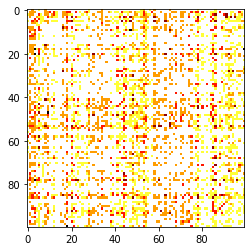

In [36]:
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()

In [40]:
#plot of each variable vs y
plt.scatter(x[:,0], y, color='blue', marker= 'o', label= 'x_1')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('x_1 vs y')
plt.legend()

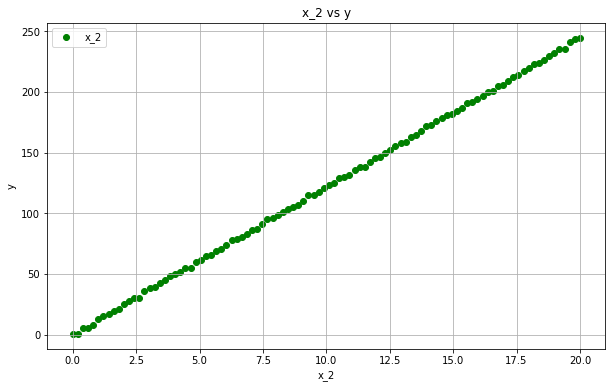

In [41]:
plt.scatter(x[:,1], y, color='green', marker= 'o', label= 'x_2')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('x_2')
plt.ylabel('y')
plt.title('x_2 vs y')
plt.legend()

In [43]:
plt.scatter(x[:,2], y, color='red', marker= 'o', label= 'x_3')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('x_3 vs y')
plt.legend()

In [44]:
# Create the linear regression model
regr = linear_model.LinearRegression()

In [45]:
# Fit the model
regr.fit(x, y)

LinearRegression()

In [47]:
regr.intercept_, regr.coef_

(-0.1771939056425964, array([4.07123285, 4.07123285, 4.07123285]))

In [50]:
predicted = pd.DataFrame(regr.predict(x), columns=['Predicted']) # Create new dataframe of column'Predicted Price'
actual = pd.DataFrame(y, columns=['Actual'])
actual = actual.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actual,predicted],axis =1)
df_actual_vs_predicted.T

0         1         2         3         4          5   \
Actual     0.903450  0.498015  5.455681  5.776675  8.062118  12.565494   
Predicted -0.177194  2.290220  4.757634  7.225048  9.692461  12.159875   

                  6          7          8          9   ...          90  \
Actual     15.473618  16.734753  19.739369  21.323876  ...  222.815971   
Predicted  14.627289  17.094703  19.562117  22.029531  ...  221.890053   

                   91          92          93          94          95  \
Actual     223.676576  226.444573  229.775779  231.980357  235.675966   
Predicted  224.357467  226.824880  229.292294  231.759708  234.227122   

                   96          97          98          99  
Actual     235.264350  240.724062  243.290362  244.729198  
Predicted  236.694536  239.161950  241.629363  244.096777  

[2 rows x 100 columns]

In [51]:
plt.scatter(y, regr.predict(x))
plt.xlabel('actual')
plt.ylabel('predicted')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("actual vs predicted")

Text(0.5, 1.0, 'actual vs predicted')